In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.cluster as clu

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(666)



In [2]:
#Kmeans clustering function

def Kmeans_clustering( df, k, iterations):
    #df = the dataset as a dataframe
    # k = number of clusters
    #number of iterations

    # =============================================================================
    # 1: Select centroids
    # =============================================================================

    def select_centroids(df, k):
        centroids = df.sample(n=k, replace=False)
        return centroids

    # =============================================================================
    # 2: kmeans
    # =============================================================================

    def get_closest_cluster(row):
        distances = []

        for centroid in centroids.values:
            distances.append(np.linalg.norm(centroid - row))
        return distances.index(min(distances)) + 1

    centroids = select_centroids(df, k)

    df['closest'] = df.apply(get_closest_cluster, axis=1)


    # =============================================================================
    # 3: looping
    # =============================================================================

    for it in range(iterations):
        print(it) 
        new_centroids = []
        for i in range(1,k+1):

            cluster_data = df[df['closest'] == i].iloc[:,:-1]
            new_centroids.append(np.mean(cluster_data, axis=0))
            #compute the mean of the cluster which is the new centroids

        print(new_centroids)
        centroids= pd.DataFrame(new_centroids)
        #set new centroids as centroids to use in iteration
        df['closest'] = df.iloc[:,:-1].apply(get_closest_cluster, axis=1)
        #update closest cluster column with the new clostest cluster

        sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
        sb.scatterplot(data = centroids, x = 0, y = 1, color= 'red')
        #update 0 and 1 in both lines above to see the plot (line 1) and the centroids (line 2) 
        #for the dimensions you want to compare

        plt.show()



## PSO algorithm

In [12]:
#We have not been able to finish this class

class PSO ():
    def __init__ (self, data, w=0.73, v=[10], a=1.5, b=1.5, pso = False, k =3, iterations = 1, n_particles = 1):
        self.data = data
        self. pso = pso
        #number of centroids per particle
        self.k = k
        self.iterations = iterations
        #number of particles
        self.n_particles = n_particles
        
        self.w = w
        self.v = v
        self.a = a
        self.b = b
        
    def initialize_particles (self): 
        n = self.n_particles 
        particles = []
        cluster_values = []
        cluster_distances = []
        for i in range(n):
            #sample a random value
            np.random.seed(10+i)
            index = np.random.choice(len(self.data), self.k, replace=False) 
            print(f'index: {index}')
            particles.append(self.data[index])
            
            cluster_value = [self.get_closest_cluster(x, particles[i]) for x in self.data]
            cluster_values.append(cluster_value)
            cluster_distance = [self.get_distance_cluster(x, particles[i]) for x in self.data]
            cluster_distances.append(cluster_distance)
        
        return list(zip(particles, cluster_values, cluster_distances))
    
    def get_closest_cluster(self, point, particle):
        distances = []
        for centroid in particle:
            distances.append(np.linalg.norm(centroid - point))
        return distances.index(min(distances))
    
    def get_distance_cluster(self, point, particle):
        distances = []
        for centroid in particle:
            distances.append(np.linalg.norm(centroid - point))
        return min(distances)
    
    def get_fitness(self, particle):
        centroids, cluster_values, distances = particle
       
        means = []
        for i in range(self.k):
            #j == the cluster in the particle
            data = self.data
            filter_array = np.array(cluster_values) == i
            distances = data[filter_array]
            
            average_distance = np.mean(distances)
            
            means.append(average_distance * len(distances)/len(data))
        return sum(means)
    
    def plot_particle(self, particle):
        centroids, cluster_values, distances = particle
        
        centroids = pd.DataFrame(centroids)
        df = pd.DataFrame(data=self.data)
        df['closest'] = cluster_values
       
        sb.scatterplot(data = df, x = 0, y = 1, hue='closest')
        sb.scatterplot(data =  centroids, x = 0, y = 1, color= 'red')
        plt.show()
        
        plt.show()
        
    def update(self):
        # r1 = np.random.random()
        # r2 = np.random.random()
        r1 = 0.5
        r2 = 0.5
        
        
        for i in range(len(self.particles)):
            centroids, values, distances = self.particles[i]
            best_centroids, _, _ = self.best_particles[i]
            
            term1 = self.w * self.v[i] 
            term2 =  self.a * r1  * (np.array(best_centroids) - np.array(centroids))
            term3 = self.a * r2  * (np.array(best_centroids) - np.array(centroids))
            self.v[i] = term1 + term2 + term3
            
            # print(f'term1: {term1}')
            # print(f'term2: {term2}')
            # print(f'term3: {term3}')
            
            new_centroids = centroids + self.v[i]
            
            
            cluster_value = [self.get_closest_cluster(x, new_centroids) for x in self.data]
            cluster_distance = [self.get_distance_cluster(x, new_centroids) for x in self.data]
            self.particles[i] = (new_centroids, cluster_value, cluster_distance)
    
    def run(self):
        #Each particle is a tuple: (centroids, values, distances)
        self.particles = self.initialize_particles()
        self.best_particles = self.particles.copy()
        self.best_global = self.particles[0]

  
        # self.cluster_values = []
        # self.cluster_distances = []
    

        for it in range(self.iterations):
            for i in range(len(self.particles)):
                centroids, cluster_values, cluster_distances = self.particles[i]
                #recompute the particles
                new_centroids = []
                for j in range(self.k):
                    #j == the cluster in the particle
                    data = self.data
                    filter_array = np.array(cluster_values) == j
                    
                    cluster_data = data[filter_array]
                    centroid = [x for x in np.mean(cluster_data, axis = 0)]
                    
                    new_centroids.append(centroid)
               
                cluster_value = [self.get_closest_cluster(x, new_centroids) for x in self.data]
                cluster_distance = [self.get_distance_cluster(x, new_centroids) for x in self.data]
                self.particles[i] = (new_centroids, cluster_value, cluster_distance)
            
                #UPDATE LOCAL BEST
                condition = self.get_fitness(self.particles[i]) < self.get_fitness(self.best_particles[i]) 
                self.best_particles[i] = self.particles[i] if condition else  self.best_particles[i] 
            best_index = np.argmin([self.get_fitness(x) for x in self.best_particles])
            self.best_global = self.best_particles[best_index]
            self.update()
            #print(self.particles[0])
        self.plot_particle(self.best_global)
        self.plot_particle(self.particles[0])
        print(f'fitness: {self.get_fitness(self.best_global)}')
        
                
        # return self.cluster_values, self.cluster_distances, self.particles
        return self.best_global

## Iris dataset
### Kmeans clustering

0
[0    6.874286
1    3.088571
2    5.791429
3    2.117143
dtype: float64, 0    5.945313
1    2.759375
2    4.451563
3    1.443750
dtype: float64, 0    5.007843
1    3.409804
2    1.492157
3    0.262745
dtype: float64]


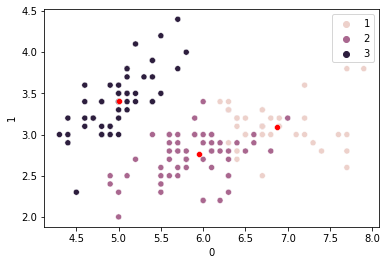

1
[0    6.870270
1    3.086486
2    5.745946
3    2.089189
dtype: float64, 0    5.904762
1    2.746032
2    4.412698
3    1.433333
dtype: float64, 0    5.006
1    3.428
2    1.462
3    0.246
dtype: float64]


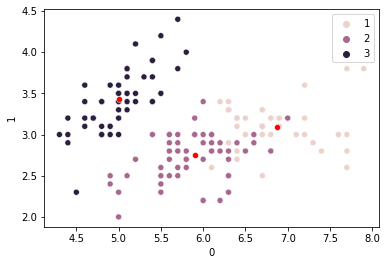

2
[0    6.850000
1    3.073684
2    5.742105
3    2.071053
dtype: float64, 0    5.901613
1    2.748387
2    4.393548
3    1.433871
dtype: float64, 0    5.006
1    3.428
2    1.462
3    0.246
dtype: float64]


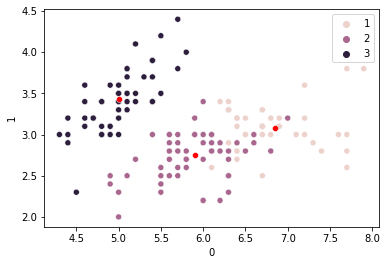

In [13]:
# Perform Kmeans clustering on the iris dataset
iris_x = load_iris()['data']
df = pd.DataFrame(data=iris_x)
#number of clusters
k = 3
#number of iterations
iterations = 3

Kmeans_clustering(df, 3, 3)

### PSO clustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass return_X_y=data as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


index: [ 87 111  10]
index: [112 145 133]
index: [ 40 146  38]


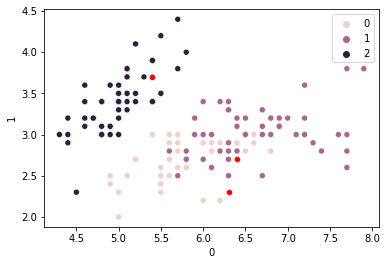

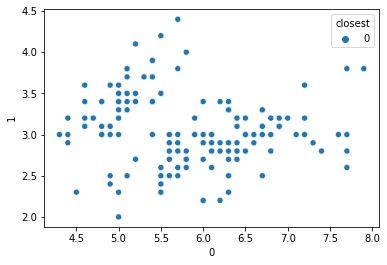

fitness: 3.4644999999999997


In [18]:
data = load_iris('data')[0] 
     
pso = PSO(data, iterations = 9, n_particles = 3, v = [0.5,0.6,0.4])
particle = pso.run()

## Artificial 1 dataset

In [5]:
# Creating the "Artificial 1" dataset as described in the paper Data Clustering using Particle Swarm Optimization
artf_x = np.random.uniform(-1, 1, size = (400, 2))
artf_y = []

for values in artf_x:
    if values[0] >= 0.7:
        artf_y.append(1)
    elif values[0] <= 0.3 and values[1]>= -values[1]-0.2:
        artf_y.append(1)
    else:
        artf_y.append(0)

### Kmeans clustering

0
[0    0.070952
1    0.458636
dtype: float64, 0   -0.066217
1   -0.504317
dtype: float64]


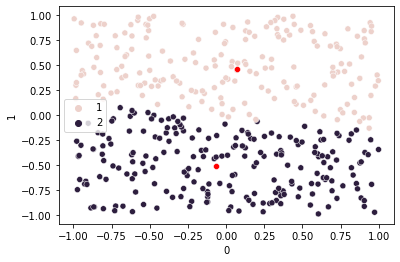

1
[0    0.024483
1    0.499318
dtype: float64, 0   -0.018336
1   -0.490303
dtype: float64]


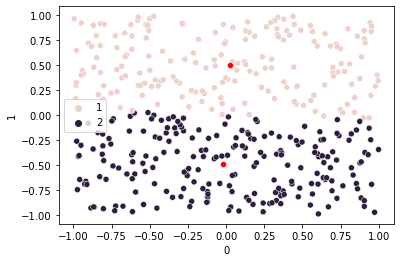

2
[0    0.002811
1    0.509751
dtype: float64, 0    0.000720
1   -0.485445
dtype: float64]


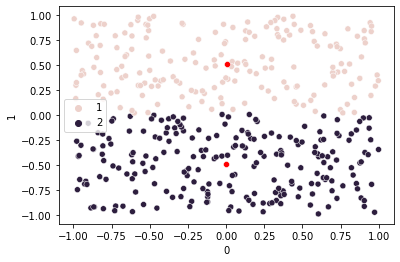

In [6]:
#set dataset, number of clusters and number of iterations
df = pd.DataFrame(data=artf_x)
k = 2
iterations = 3
Kmeans_clustering(df, 2, 3)


## PSO clustering

index: [332 111 352]
index: [276 274 164]
index: [280 387 313]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


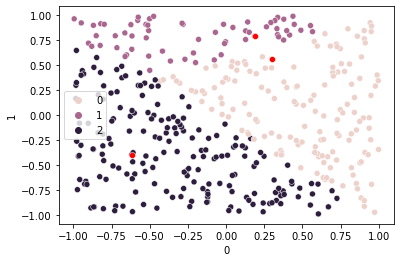

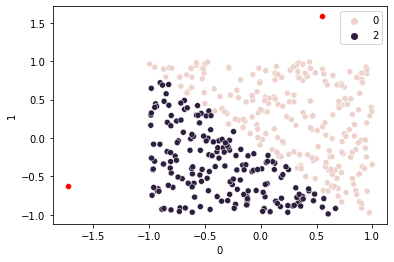

fitness: -0.012986745441665531


In [20]:
data=artf_x 
     
pso = PSO(data, iterations = 9, n_particles = 3, v = [0.5,0.6,0.4])
particle = pso.run()

# Excercise 4
#### Figure 1 shows a (toy) problem instance for the 2-cardinality tree problem. The 2-cardinality tree problem amounts to finding a subtree T of a given undirected graph G with exactly 2 edges and the minimum possible weight.

## 4.a 
#### Is ACO for this problem a Competition-Balanced System (CBS)? Justify your answer.


ACO for this problem is not a competition balanced system. This is because not all c in C where C is the set of solution components occur in the same number of feasible solutions.

A feasible solution is described by Blum, Christian, and Marco Dorigo as "A feasible solution is a complete assignment (i.e., an assignment in which each decision variable has a domain value assigned) that satisfies the constraints". 

A solution for this problem consists of 2 variables: edge A and edge B which both have a domain value assigned to them (the edge weight. 

In figure 1, we have three solutions: 1-2-3 with a weight of 3, 2-3-4 with a weight of 4 and 3-4-5 with a weight of 3. All of these solutions are feasible solutions, because they all have a value that falls within the domain which is the domain fo the natural numbers for this problem. 

For any feasible partial solution we take, we can form one of these three solutions, since a partial solution consists of one edge, and we are allowed to add one more edge to complete the solution. 

In the slides, a Competition-balanced system is described as: "An ACO and a problem instance are Competition Balanced System (CBS) if given a feasible partial solution $S_{p}$ and the set C of solution components that can be added to extend $S_{p}$, all c in C occur in the same number of feasible solutions"

As we can see, 3 occurs in 3 solutions, 2 and 4 occur in 2 solutions and 1 and 5 occur in one solution. Thus not all c occur in the same number of feasible solutions, and thus the problem is not competition balanced. 